In [114]:
# Libraries
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

Newton's law of Gravity:
$$\vec{F} = - G\frac{m_1m_2}{|\vec{r}|^2}\hat{r}$$
where:$$\vec{r} = \vec{r}_1 - \vec{r}_2$$ $$\hat{r} = \frac{\vec{r}}{|\vec{r}|}$$

In [115]:
# Data: 
AU = 1.5e11
earth_mass = 5.972e24
sun_mass = 2.0e30
daysec = 24.0*60*60  
earth_aphelion_velocity = 29290
earth_aphelion_momenta = earth_aphelion_velocity * earth_mass

In [116]:
# Creating a Class that will hold the information of the planetary system objects such as planets and stars
class SystObj:
    def __init__(self, mass = float, position = np.array, momentum = np.array):
        self.mass = mass
        self.position = position
        self.momentum = momentum

star = SystObj(sun_mass, np.array([0,0]), np.array([0,0]))
planet = SystObj(earth_mass, np.array([1.0167*AU,0]), np.array([0,earth_aphelion_momenta]))

In [117]:
def gravforce(obj1 = SystObj, obj2 = SystObj):
    '''Calculates the gravitational force between two objects.'''
    # The Gravitational constant:
    G = 6.67e-11 
    # Distance vector between the two objects
    dis_vec = obj1.position - obj2.position
    # Calculating the magnitude of the distance vector
    dis_mag = np.linalg.norm(dis_vec)
    # Calculating the unit distance vector:
    unit_vec = dis_vec/dis_mag
    # Calculating the force vector:
    force_vec = -G*(obj1.mass*obj2.mass/dis_mag**2)*unit_vec
    return force_vec

In [118]:
# The simulation
dt = 1*daysec
t = 0
star_position_history = [list(star.position)]
planet_position_history = [list(planet.position)]
while t<3*365*daysec:
    # Calculate the force between objects
    starforce = gravforce(star, planet)
    planetforce = gravforce(planet, star)
    # Update momentum:
    star.momentum = star.momentum + starforce*dt
    planet.momentum = planet.momentum + planetforce*dt
    # Update position
    star.position = star.position + (star.momentum/star.mass)*dt
    planet.position = planet.position + (planet.momentum/planet.mass)*dt
    # Record the position of the objects
    star_position_history.append(list(star.position))
    planet_position_history.append(list(planet.position))
    
    t +=dt

In [119]:
posx_planet = np.array(planet_position_history)[:,0]
posy_planet = np.array(planet_position_history)[:,1]
posx_sun = np.array(star_position_history)[:,0]
posy_sun = np.array(star_position_history)[:,1]

(-161739288534.53796,
 167473999074.16354,
 -165820864259.27753,
 163342620429.45212)

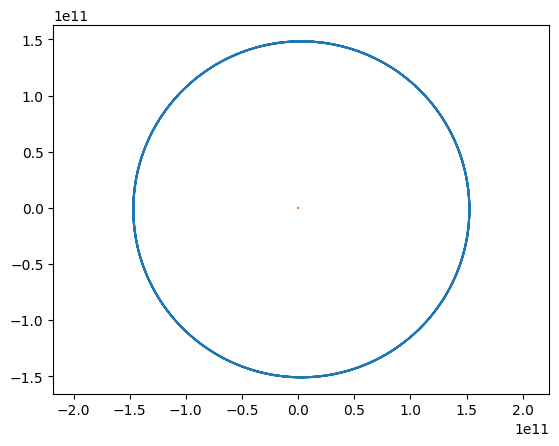

In [120]:
plt.plot(posx_planet, posy_planet)
plt.plot(posx_sun, posy_sun)
plt.axis('equal')

In [121]:
max(posx_planet)

152509758728.31348

C:\Users\jmton\AppData\Local\Temp\ipykernel_11444\3720819658.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  l_p, = plt.plot([],[], 'k-', color = "blue")
C:\Users\jmton\AppData\Local\Temp\ipykernel_11444\3720819658.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  l_s, = plt.plot([],[], 'k-', color = "orange")


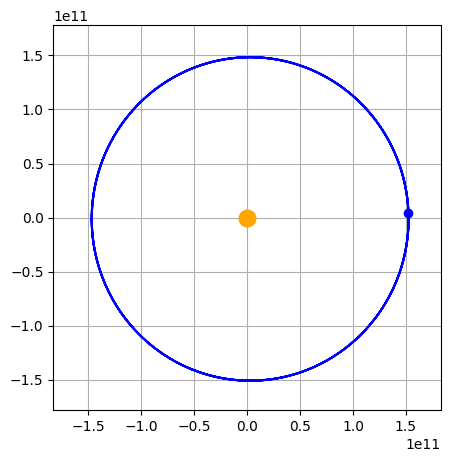

In [122]:
fig = plt.figure(figsize=(5,5))

l_p, = plt.plot([],[], 'k-', color = "blue")
point_e, = plt.plot([], [], marker="o", markersize=6, markeredgecolor="blue", markerfacecolor="blue")
point_s, = plt.plot([], [], marker="o", markersize=12, markeredgecolor="orange", markerfacecolor="orange")
l_s, = plt.plot([],[], 'k-', color = "orange")
plt.xlim(-max(posx_planet)*1.2,max(posx_planet)*1.2)
plt.ylim(-max(posy_planet)*1.2,max(posy_planet)*1.2)
writer = PillowWriter(fps = 30)
plt.grid()

xplanet = []
yplanet = []
xstar = []
ystar = []
with writer.saving(fig, "OnePlanet.gif", 100):
    for i in range(0,len(posx_planet)):
        xplanet.append(posx_planet[i])
        yplanet.append(posy_planet[i])
        xstar.append(posx_sun[i])
        ystar.append(posy_sun[i])

        l_p.set_data(xplanet, yplanet)
        l_s.set_data(xstar, ystar)
        writer.grab_frame()

        point_e.set_data(posx_planet[i], posy_planet[i])
        point_s.set_data(posx_sun[i], posy_sun[i])
# with writer.saving(fig, "OnePlanet.gif", 100):
#     for xval in np.linspace(-5,5,100):
#         xlist.append(xval)
#         ylist.append(np.sin(xval)*3)
#         l.set_data(xlist, ylist)

#         writer.grab_frame()        